In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# 1. Data Overview
print("Data Overview:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location    

In [3]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429       


Univariate Analysis - Histograms


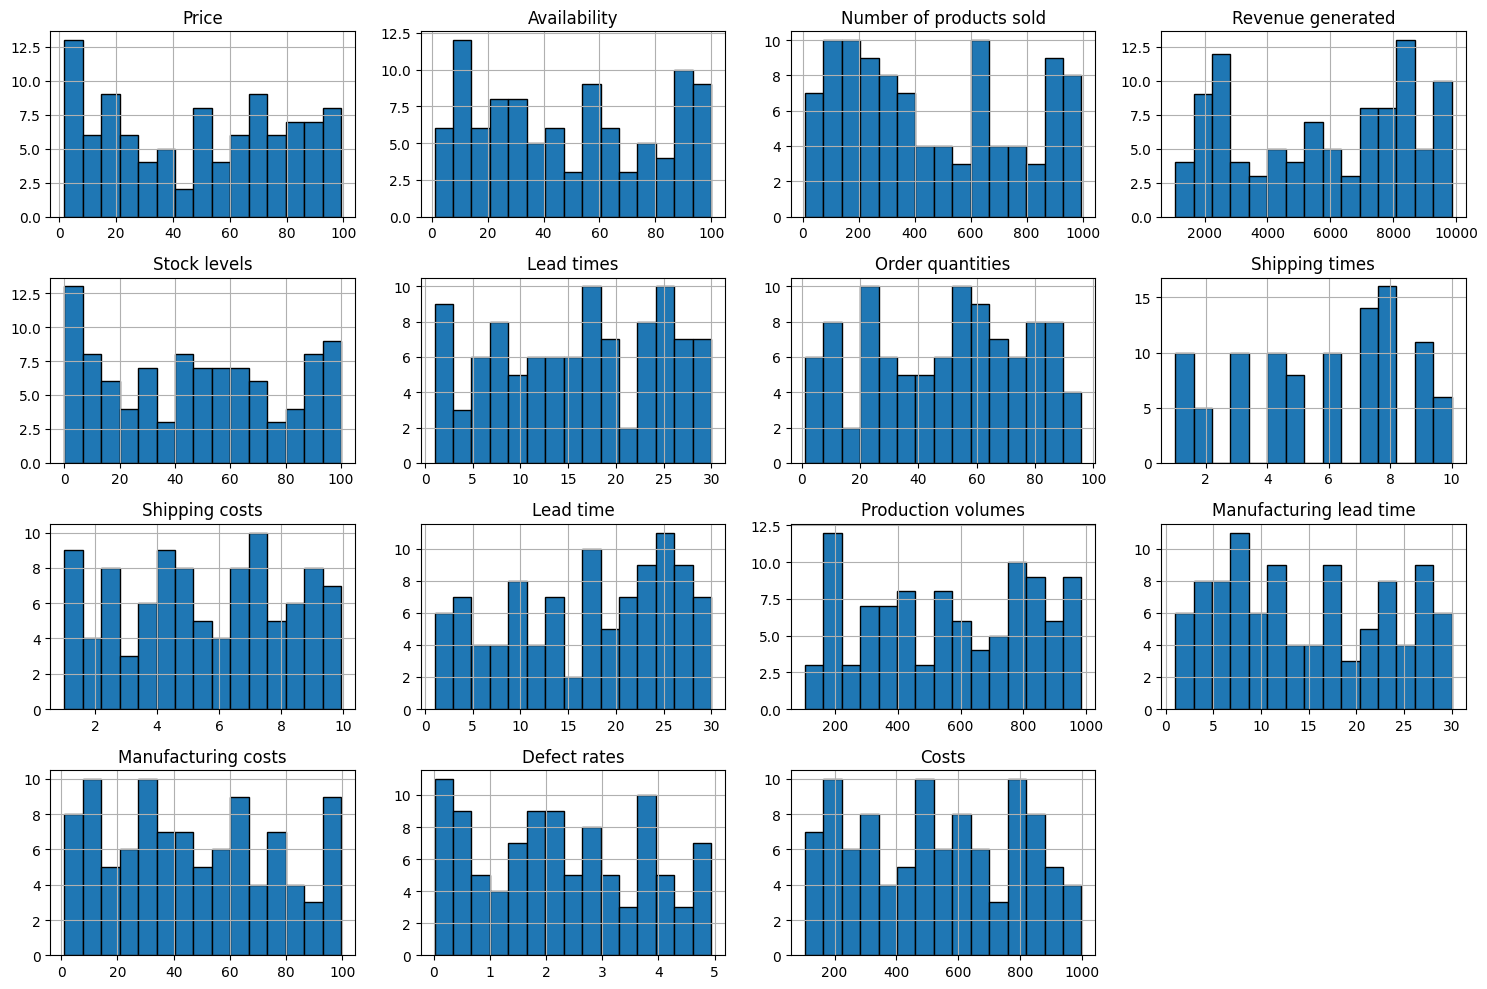

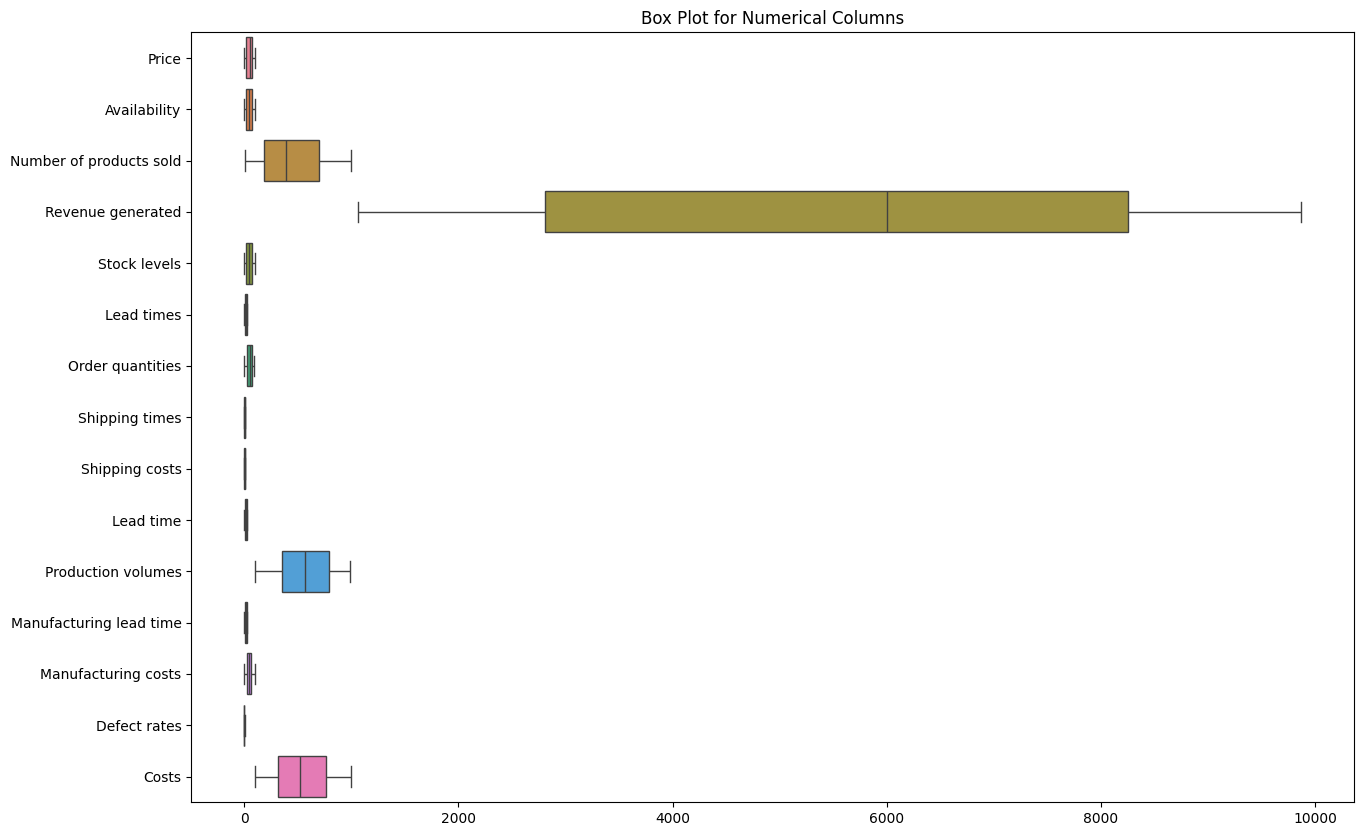

Columns 'Sales' and 'Profit' not found in the dataset.


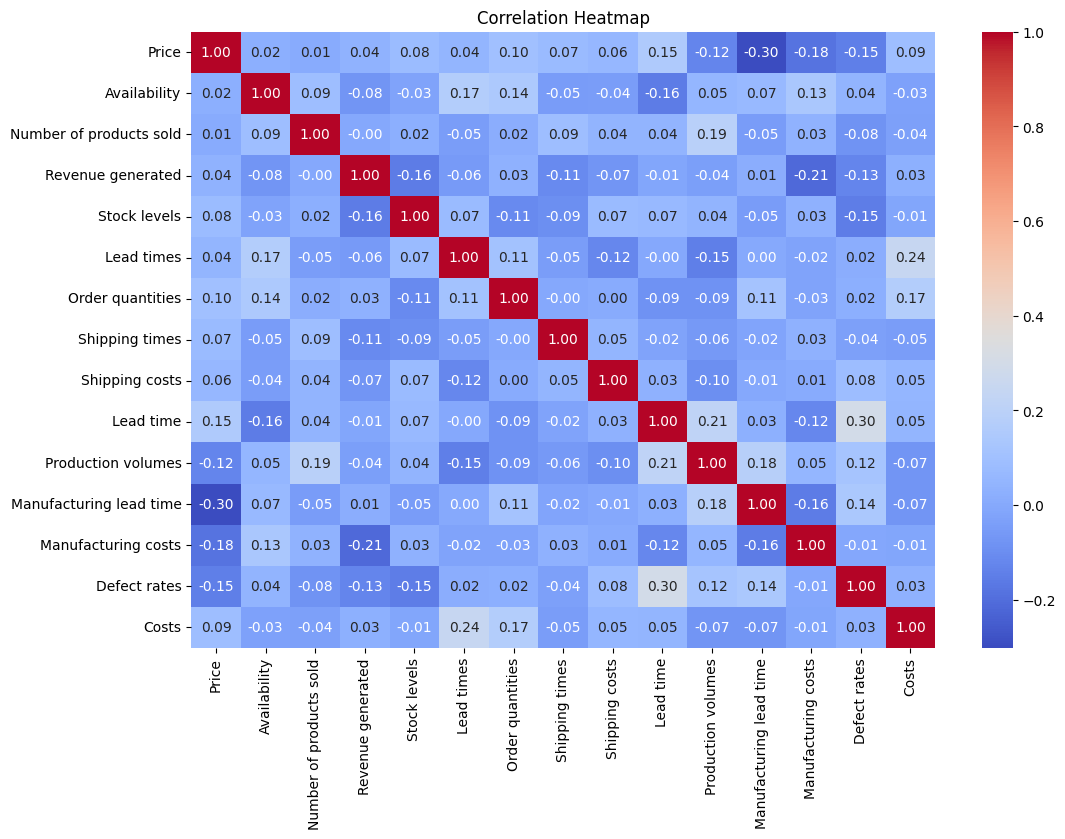

In [6]:
# 3. Exploratory Data Analysis (EDA)

# Univariate Analysis - Histograms for numerical columns
print("\nUnivariate Analysis - Histograms")
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Box plot to detect outliers for each numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numerical_columns], orient='h')
plt.title("Box Plot for Numerical Columns")
plt.show()

# Bivariate Analysis - Scatter plot between Sales and Profit
if 'Sales' in data.columns and 'Profit' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Sales', y='Profit', alpha=0.7)
    plt.title("Sales vs. Profit")
    plt.xlabel("Sales")
    plt.ylabel("Profit")
    plt.show()
else:
    print("Columns 'Sales' and 'Profit' not found in the dataset.")

# Correlation Analysis - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# 4. Segmentation and Grouping - Analyze Average Profit by Category
if 'Category' in data.columns and 'Profit' in data.columns:
    category_profit = data.groupby('Category')['Profit'].mean()
    print("\nAverage Profit by Category:")
    print(category_profit)
    
    # Visualize the average profit by category
    category_profit.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Profit by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Profit')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'Category' and 'Profit' not found for grouping analysis.")


Columns 'Category' and 'Profit' not found for grouping analysis.


In [10]:
# 5. Trend Analysis (if 'Order Date' is available)
if 'Order Date' in data.columns:
    # Convert 'Order Date' to datetime
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
    
    # Drop rows with invalid or missing 'Order Date'
    data = data.dropna(subset=['Order Date'])
    
    # Extract the month and year for trend analysis
    data['Month'] = data['Order Date'].dt.to_period('M')
    
    # Calculate monthly sales
    monthly_sales = data.groupby('Month')['Sales'].sum()
    
    # Plot monthly sales trend
    monthly_sales.plot(figsize=(12, 6), marker='o', color='green')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
else:
    print("Column 'Order Date' not found for trend analysis.")


Column 'Order Date' not found for trend analysis.


In [11]:
print("Columns in the dataset:", data.columns)


Columns in the dataset: Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


In [12]:
if 'Category' in data.columns and 'Sales' in data.columns:
    category_sales = data.groupby('Category')['Sales'].sum()
    print("Total Sales by Category:")
    print(category_sales)
    category_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Total Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'Category' and 'Sales' not found for category analysis.")


Columns 'Category' and 'Sales' not found for category analysis.


In [13]:
if 'Category' in data.columns and 'Stock levels' in data.columns:
    avg_stock_levels = data.groupby('Category')['Stock levels'].mean()
    print("Average Stock Levels by Category:")
    print(avg_stock_levels)
    avg_stock_levels.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Average Stock Levels by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Stock Level')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'Category' and 'Stock levels' not found for stock analysis.")


Columns 'Category' and 'Stock levels' not found for stock analysis.
